# Data Preparation and Pre-prediction Analysis

## Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Helper Functions
---

In [2]:
def plot_boxplots(dataset, quant_attributes):
    ncols = 3
    nrows = math.ceil(len(quant_attributes)/3)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9,15))
    for index, attribute in enumerate(quant_attributes):
        col = index//ncols
        row = index%ncols
        age_list = bank_marketing[attribute].values
        subplot_title = '{attribute} Box Plot'.format(attribute=attribute.capitalize())
        ax[col, row].boxplot(age_list)
        ax[col, row].set_title(subplot_title)
    fig.suptitle("Quantitative Attributes")
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [89]:
def plot_histograms(dataset, quant_attributes):
    ncols = 3
    nrows = math.ceil(len(quant_attributes)/3)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,15))
    for index, attribute in enumerate(quant_attributes):
        col = index//ncols
        row = index%ncols
        age_list = bank_marketing[attribute].values
        subplot_title = '{attribute} Box Plot'.format(attribute=attribute.capitalize())
        ax[col, row].hist(age_list, bins=50)
        ax[col, row].set_title(subplot_title)
    fig.suptitle("Quantitative Attributes")
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [95]:
def get_pie_chart_by_attribute_name(df, attribute_name):
    labels = pd.value_counts(bank_marketing[attribute_name]).index
    values = pd.value_counts(bank_marketing[attribute_name]).values
    fig1, ax1 = plt.subplots(figsize=(6, 5))
    fig1.subplots_adjust(0,0,1,1)
    _, _ = ax1.pie(values, startangle=90)
    ax1.axis('equal')
    total = sum(values)
    plt.legend(
        loc='right',
        labels=['%s, %1.1f%% (%s)' % (
            l, (float(s) / total) * 100, str(s)+'/'+str(total)) for l, s in zip(labels, values)],
        prop={'size': 11},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )
    fig1.suptitle('{attribute} Pie Chart'.format(attribute=attribute_name.capitalize()), y=1)
    plt.show()

## Data Exploration
---

In [4]:
# Loading the data into the Pandas dataframe
# From here we can see this dataset has 4521 records
bank_marketing = pd.read_csv("bank_marketing.csv")
len(bank_marketing)

4521

In [20]:
# Exploring the bank marketing dataset.
bank_marketing.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
# Before our analysis, we check how many values are missing from each column
bank_marketing.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Pre-prediction Analysis
---

- **Find max, min, mean and standard deviation of attributes.**

In [130]:
quant_attributes_stat = bank_marketing.describe()
quant_attributes_stat

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


- **Box Plots for Each Quantitative Attributes**

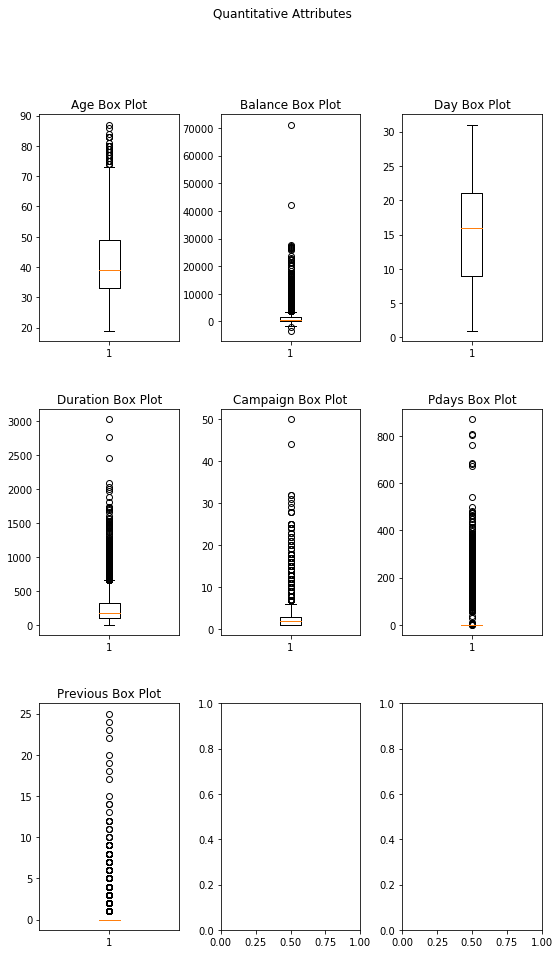

In [160]:
plot_boxplots(bank_marketing, list(quant_attributes_stat))

- **Plot Histograms for Attributes of Concern**

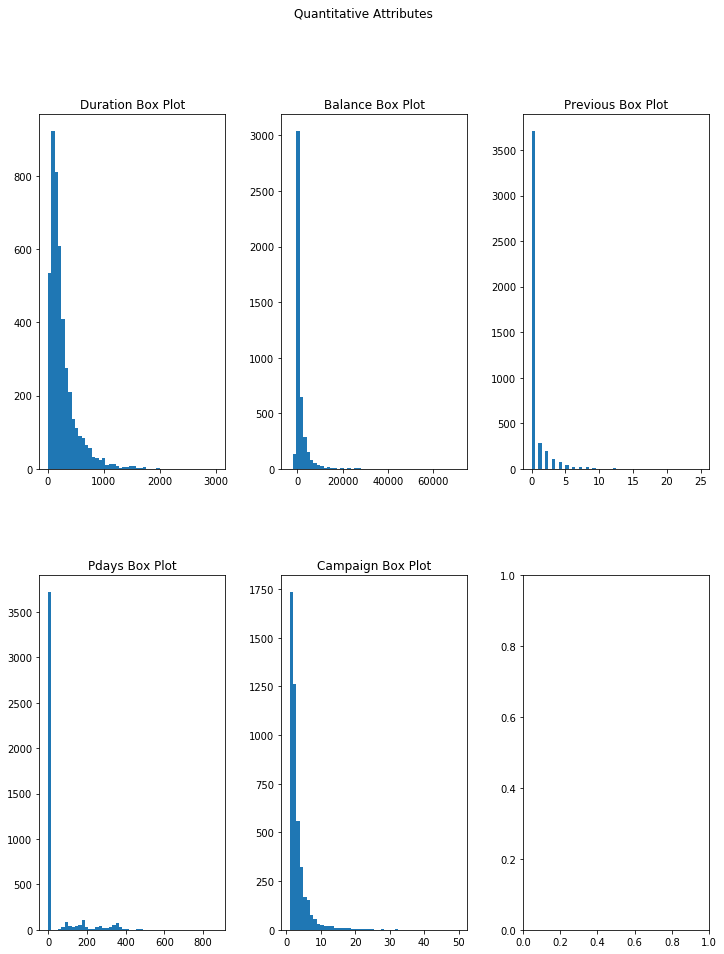

In [159]:
attributes_concern = ['duration', 'balance', 'previous', 'pdays', 'campaign']
plot_histograms(bank_marketing, attributes_concern)

- **Qualitative Attributes Distribution**

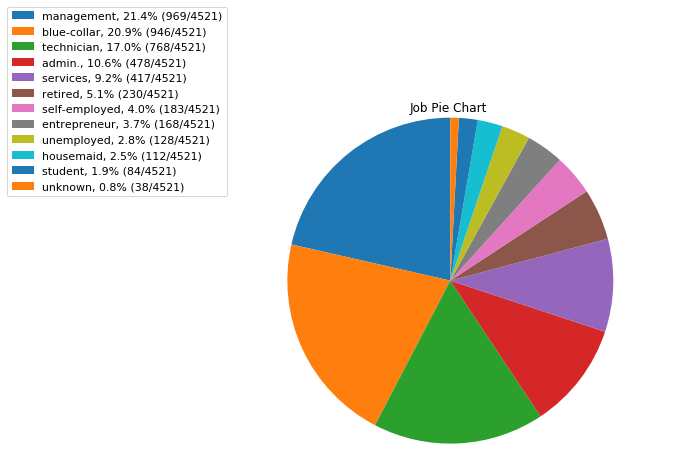

In [96]:
get_pie_chart_by_attribute_name(bank_marketing, 'job')

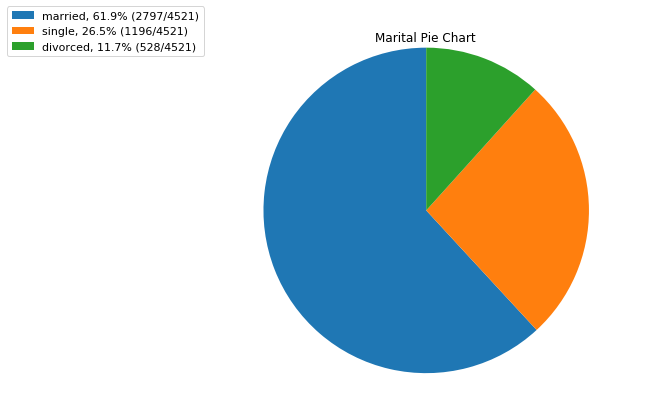

In [97]:
get_pie_chart_by_attribute_name(bank_marketing, 'marital')

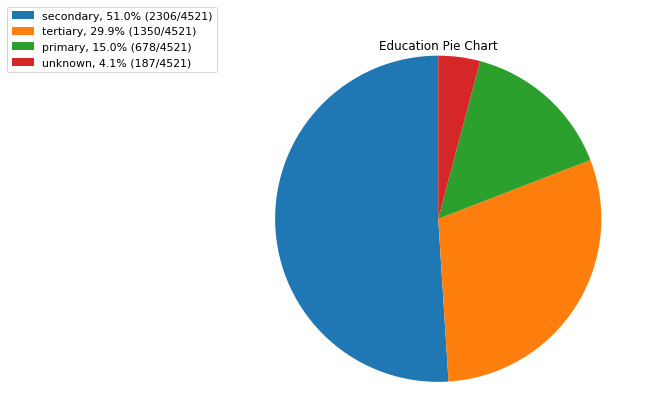

In [98]:
get_pie_chart_by_attribute_name(bank_marketing, 'education')

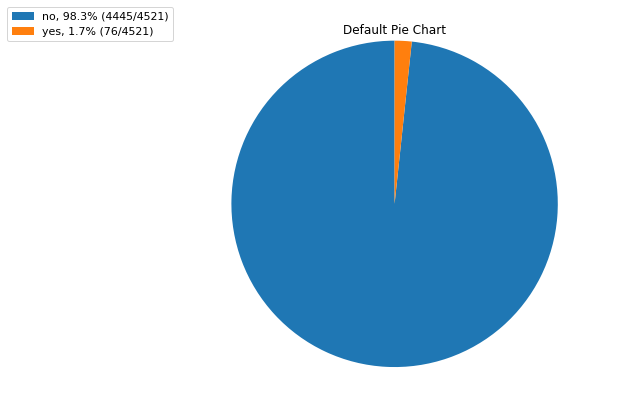

In [99]:
get_pie_chart_by_attribute_name(bank_marketing, 'default')

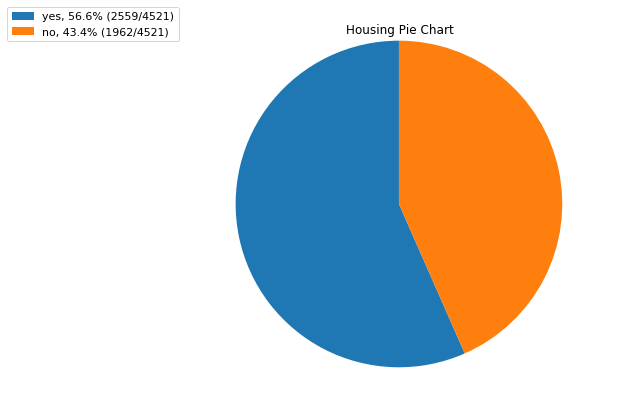

In [100]:
get_pie_chart_by_attribute_name(bank_marketing, 'housing')

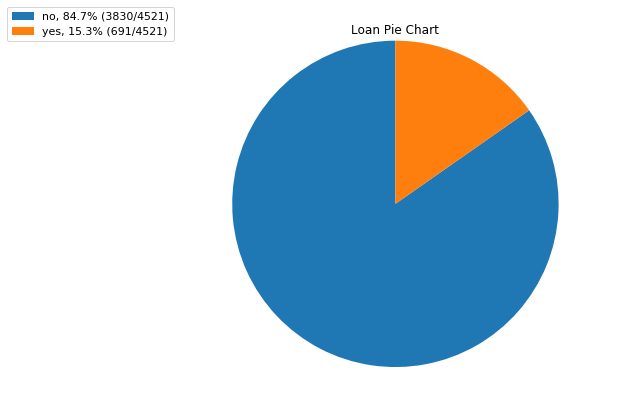

In [101]:
get_pie_chart_by_attribute_name(bank_marketing, 'loan')

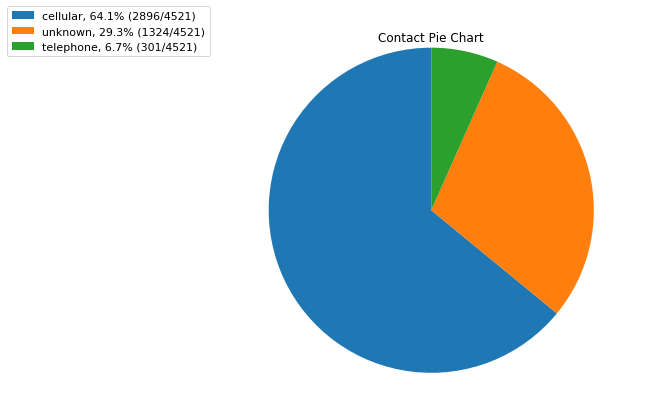

In [102]:
get_pie_chart_by_attribute_name(bank_marketing, 'contact')

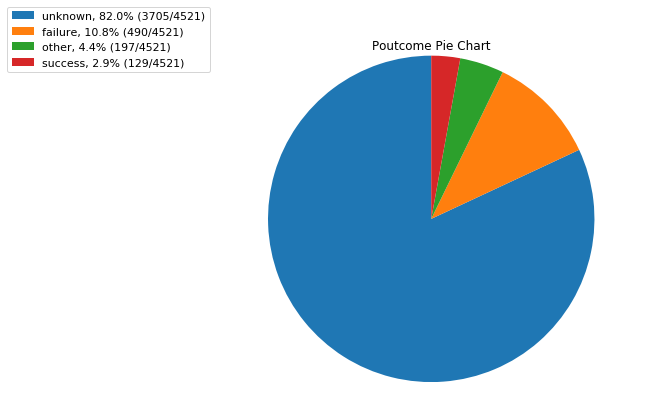

In [103]:
get_pie_chart_by_attribute_name(bank_marketing, 'poutcome')

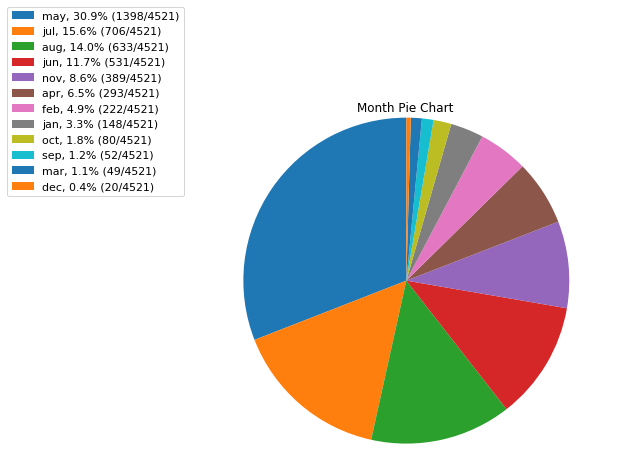

In [104]:
get_pie_chart_by_attribute_name(bank_marketing, 'month')

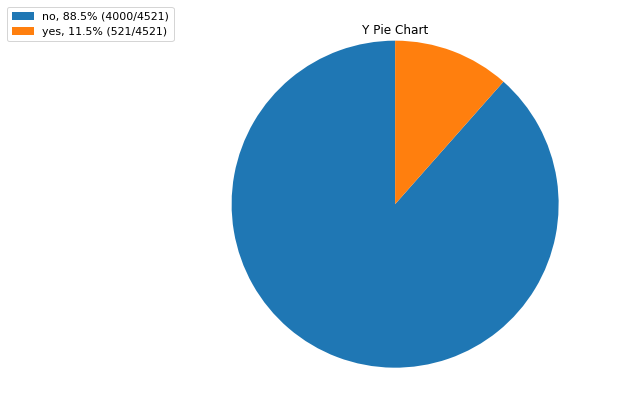

In [105]:
get_pie_chart_by_attribute_name(bank_marketing, 'y')